**Author: Mohith Reddy Arikatla**

Task #6: Prediction using Decision Tree Algorithm

**GRIP @ The Sparks Foundation**

This task required me to use a Decision Tree algorithm to classify a set of inputs to predict the species of the plant. I have also visualised the Decision Tree Classifier graphically at the end of the file.

In [33]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision Tree Algorithm
from sklearn.model_selection import train_test_split # To split the dataset
# Metrics evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
#Loading dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data consists of 150 entries with 4 parameters as inputs: SepalWidth,  SepalLength, PetalWidth, PetalLength and an output column which places them in a class.**

In [35]:
df.drop(['Id'],axis=1,inplace=True) # dropping ID column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


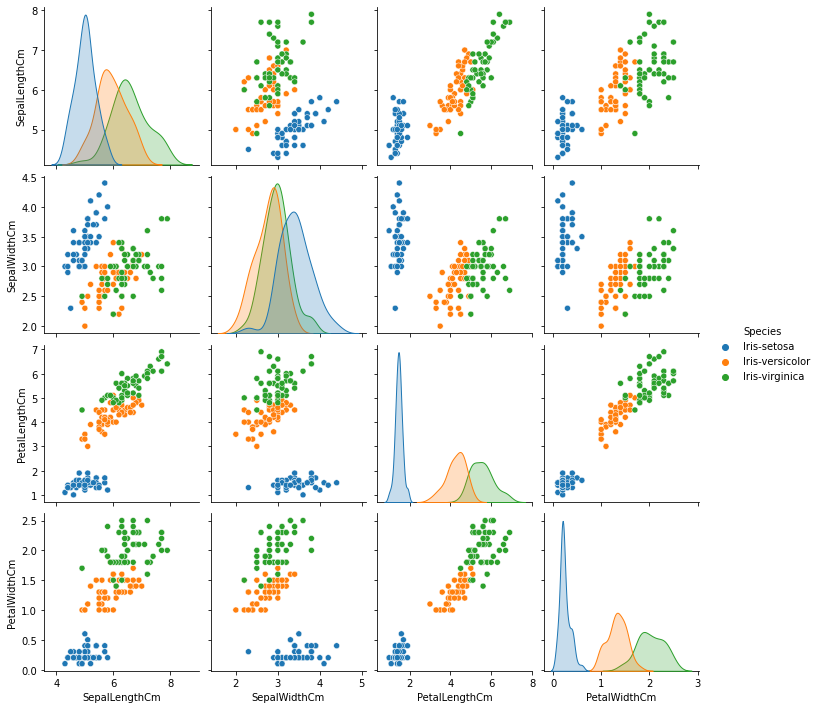

In [37]:
#Visualising the relationship between each parameter to Identify any correlation and separation between classes.
sb.pairplot(data = df,hue='Species')

The above graphs tell us that Sepal Width and Sepal Length give us no useful data to segregate the classes.

The graphs also make it clear that it is easy to differentiate Iris-setosa from the rest 2 species.

Iris-versicolor and Iris-virginica will cause confusion for the algorithm because of their close association.

**Data Pre-processing**

In [38]:
#Converting the categorical values to numbers
species_class = list(df.Species.unique())
df['Species'].replace(species_class,[x for x in range(len(species_class))],inplace =True)
#Splitting Dataset to Train and Test parts.
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.25,random_state =0)

**Data Modelling**

In [39]:
#Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(x_train,y_train)
y_pred = dt_classifier.predict(x_test)

**Evaluating Prediction accuracy**

In [40]:
data = pd.DataFrame({'Actual output':y_test,'Predicted output': y_pred})
data

,Actual output,Predicted output
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


**Visualising the Decision Tree employed to classify entries by the concepts: Entropy and Information Gain.**

In [45]:
export_graphviz(dt_classifier,out_file='decisionTree.dot',feature_names=df.columns[:-1],class_names=species_class,rounded=True,filled=True)

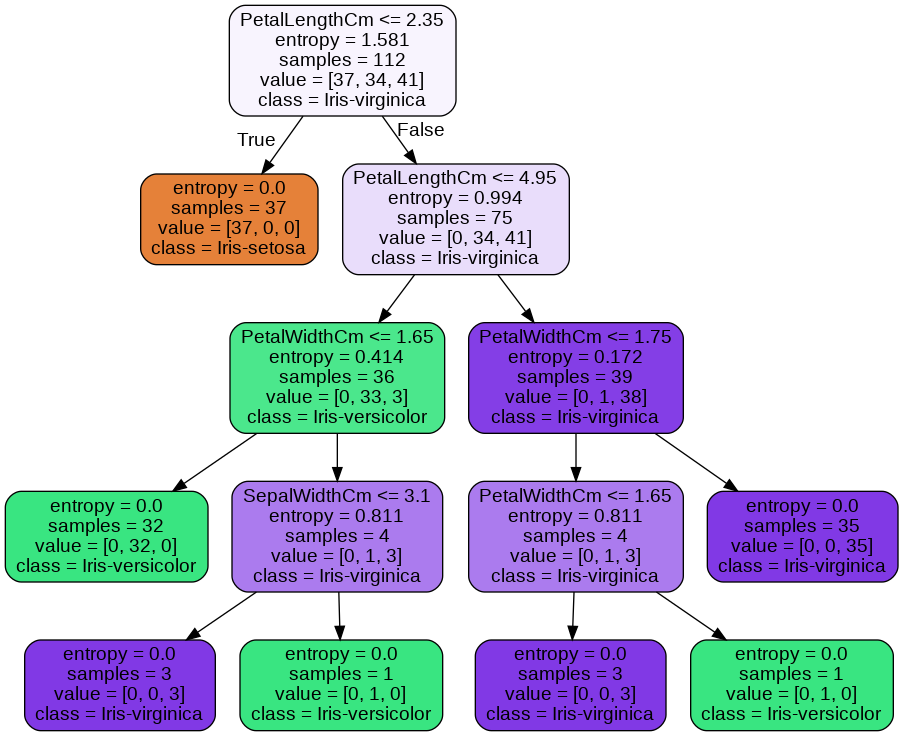

In [46]:
(graph,)=pydot.graph_from_dot_file('decisionTree.dot')
graph.write_png('decisionTree.png')
Image(filename='decisionTree.png')

Confusion matrix compares the predicted values to the actual values by returning a 2D matrix with False Positive and Negative values.
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Heatmap for the above Confusion Matrix:



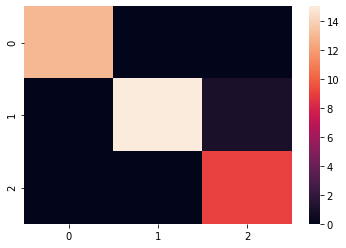

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix compares the predicted values to the actual values by returning a 2D matrix with False Positive and Negative values.")
print(cm)
print("Heatmap for the above Confusion Matrix:\n")
hm = sb.heatmap(cm)

**Any value outside the diagonal is a mistake in prediction. Since out dataset was good enough it didn't make many mistakes. Under conditions where there is a bad dataset, there could be several mistakes in prediction. These can be optimised by tuning parameters in the classifiers.**

**Thank you for going through my code.**